---
title: "AB Testing"
author: "M. Liu"
date: "May 12, 2016"
output: html_document
---

## Abstract

[A/B testing][3], as we all know it, a method to split the experiment sample into two groups - _control_ and _treatment_ to test the designate _hypothesis_.

It usually involves data collection, exploration and analysis to form the _hypothesis_ and estimate the required sample size. With those information in hand, the experimental design starts to create the test plan. 

To actually run the tests, researchers divide them into two - classical _frequentist_ testing procedures such as t.test, chisq test, anova and so on, and the new kid _bayesianism_ that usually involves (monte carlo) simulations and selection of _prior_.

### 1. Hypothesis and experiment design

"If _____[I do this] _____, then _____[this]_____ will happen."

couple keywords: 
randomized samples
_controlled variables_ (or explanatory variables) that can be manipulated for the treatment group
_dependant variables_, these are the targetted variables we would like to see the results. 


### 2. Sample Size Estimation
It usually comes with these default settings

Confidence Level: $\alpha = .95$  

Statistical Power:  $1-\beta = .80$

#### 2.1 Sample size for two (binomial) proportions
$n > (\frac{1.96 * .5} { M })^2 - 4$  


#### 2.2 Sample size for two (poisson) counts
$n = \frac{4}{(\sqrt{\lambda_1} - \sqrt{\lambda_2})^2}$



### 3. Statistical Test

People say any tests would do, and people have different preference on choosing frequentist vs. bayesian. Or simply run an _glm_.
Here is one [tool][4]

#### 3.1 Proportion Test (counterpart of chi-sq test)
Consider you would like to test out and which color would be favored by customers, so you have designed two buttons - green button and purple buttons, then routed 1000 customer visits to each, and you found green button been clicked 500 times and 550 for the purple.

Now the question comes, which one should we use? Purple one? What are the chances (probabilites) for purple button to beat the green?


Confidence Interval for x:  0.47 0.53 
Confidence Interval for y:  0.52 0.58 
Probability of y > x  99 %
power =  88 %


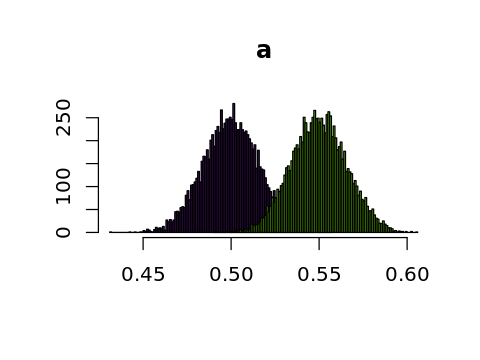

X in purple, Y in green 


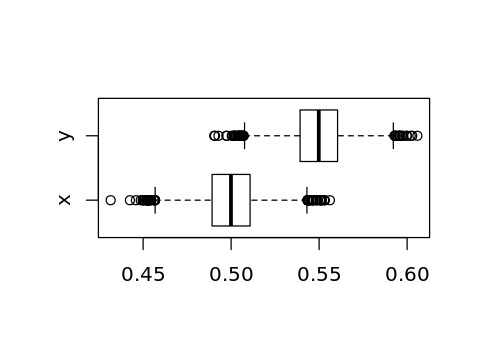

In [4]:
N = 10000
max.dec = as.integer(log10(sqrt(N)))
trial1 = 1000
success1 = 500
trial2 = 1000
success2 = 550
prior.trial = 1
prior.success = 1



x <- rbeta(N, success1 + prior.success, trial1 - success1 + prior.trial)
y <- rbeta(N, success2 + prior.success, trial2 - success2 + prior.trial)

xy <- cbind(x, y)

# quantile(x, c(.025, .975))
# quantile(y, c(.025, .975))

clm.x <- round(qbeta(c(.025, .975), success1 + prior.success, trial1 - success1 + prior.trial), max.dec)
clm.y <- round(qbeta(c(.025, .975), success2 + prior.success, trial2 - success2 + prior.trial), max.dec)

cat("Confidence Interval for x: ", clm.x, "\n")
cat("Confidence Interval for y: ", clm.y, "\n")

cat("Probability of y > x ", round(sum(y > x) /N, max.dec) * 100, "%\n")
cat("power = ", round(sum(y > quantile(x, .975)) / N, max.dec) * 100, "%\n")   # rough power
# sum(y > qbeta(.975, success1+1, trial1-success1+1)) /N

options(repr.plot.width=4, repr.plot.height=3)


hist(x, xlim=c(min(xy), max(xy)), freq=T, breaks=100, col="#49166D", main="a", xlab=NULL, ylab=NULL)  # A in red
hist(y, add=T, freq=T, breaks=100, col="#66CC00", main="     b", xlab=NULL, ylab=NULL) # B in green


boxplot(cbind(x, y), horizontal=T)
cat("X in purple, Y in green \n")

#### 3.2 Count Data (counterpart to fisher?)
Now consider you have two group of people, same number of people for each group. and both group fished the same day in the same area. Group I got 20 fish, while 25 been caught by group II. Now you would like to know which group did better on fishing? Group II? and what is the probability that group II catching more fish than group I? Furthermore, what are the probability for group II to catch 10% more fish than group I? 

Confidence Interval for a:  6.89 16.05 
Confidence Interval for b:  8.9 19.05 
Probability of b > a  76 %
power =  16 %
A in purple, B in green

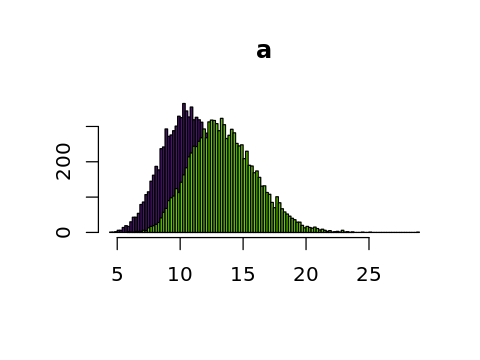

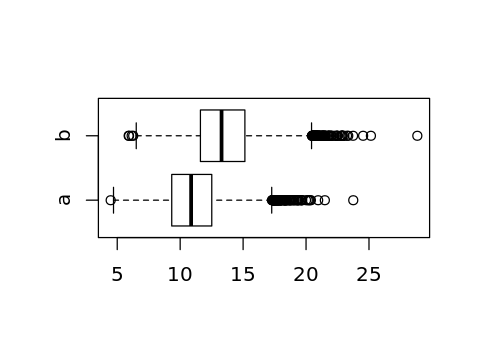

In [5]:
prior.c = 2
prior.n = 1

c1 = 20
n1 = 1
c2 = 25
n2 = 1


a <- rgamma(N, c1 + prior.c, n1 + prior.n)
b <- rgamma(N, c2 + prior.c, n2 + prior.n)

ab <- cbind(a, b)

clm.a <- round(qgamma(c(.025, .975), c1 + prior.c, n1 + prior.n), max.dec)
clm.b <- round(qgamma(c(.025, .975), c2 + prior.c, n2 + prior.n), max.dec)

cat("Confidence Interval for a: ", clm.a, "\n")
cat("Confidence Interval for b: ", clm.b, "\n")

cat("Probability of b > a ", round(sum(b > a) / N, max.dec) * 100, "%\n")
cat("power = ", round(sum(b > quantile(a, .975)) / N, max.dec) * 100, "%\n")   # rough power

# sum(b > qgamma(.975, c1 + prior.c, n1 + prior.n)) /N


hist(a, xlim=c(min(ab), max(ab)), freq=T, breaks=100, col="#49166D", main="a", xlab=NULL, ylab=NULL)   # A in red
par(new=T)
hist(b, add = T, freq=T, breaks=100, col="#66CC00", main="     b", xlab=NULL, ylab=NULL) # B in green

cat("A in purple, B in green")

#quantile(a, c(.025, .975))
#quantile(b, c(.025, .975))



boxplot(cbind(a, b), horizontal=T)


#### 3.3 (normal) data
if the data actually follows normal distribution, then ...

### 4. Peek-ah-Boo
Is bayesian immuned from peeking? 
How bad to peek during the test? 
P-value trend ?

### 5. GLM - the swiss army knife
As discussed above, be it binomial proportions, poisson counts or normal, glm has it all. Is glm the swiss army knife? Can it actually cut all the cheese?

Same example as above, but we run glm this time.


 trt       lsmean         SE df   asymp.LCL asymp.UCL
   0 2.006707e-01 0.06356417 NA  0.07608721 0.3252542
   1 2.775558e-17 0.06324555 NA -0.12395901 0.1239590

Confidence level used: 0.95 

 trt   lsmean        SE df asymp.LCL asymp.UCL
   0 3.218876 0.2000000 NA  2.826883  3.610869
   1 2.995732 0.2236068 NA  2.557471  3.433994

Confidence level used: 0.95 

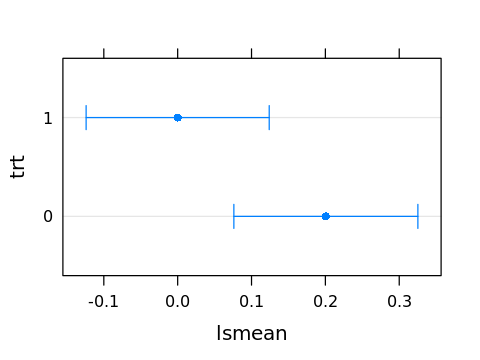

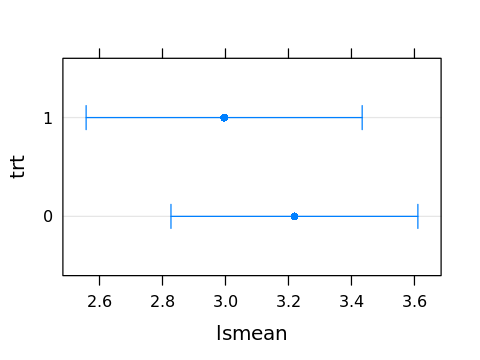

In [6]:
ab1 <- as.data.frame(rbind(c(500, 1000, 1), c(550, 1000, 0)))
ab2 <- as.data.frame(rbind(c(20, 1, 1), c(25, 1, 0)))

names(ab1) <- c("success", "trial", "trt")
names(ab2) <- c("c", "n", "trt")

suppressMessages(require(lsmeans))
suppressMessages(require(arm))

lm.ab1 <- glm(cbind(success, trial-success) ~ factor(trt), data=ab1, family=binomial)
lm.ab2 <- glm(c ~ factor(trt), offset=log(n), data=ab2, family=poisson)
lsmeans(lm.ab1, "trt")
lsmeans(lm.ab2, "trt")
plot(lsmeans(lm.ab1, "trt"))
plot(lsmeans(lm.ab2, "trt"))


blm.ab1 <- bayesglm(cbind(success, trial-success) ~ trt, data=ab1, family=binomial)
blm.ab2 <- bayesglm(c ~ trt, offset=log(n), data=ab2, family=poisson)
# sim.ab1 <- sim(blm.ab1)
# sim.ab2 <- sim(blm.ab2)

In [3]:
#install.packages(c("lsmeans", "arm"))

Installing packages into '/home/nbcommon/R'
(as 'lib' is unspecified)
also installing the dependencies 'TH.data', 'minqa', 'RcppEigen', 'estimability', 'coda', 'multcomp', 'lme4', 'nlme'




The downloaded source packages are in
	'/tmp/Rtmphfh3u9/downloaded_packages'
